IMPORTING REQUIREMENTS

In [9]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

READING THE DATASET

In [11]:
dataset=pd.read_csv('/content/Iris (1).csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
a=dataset.iloc[:,1:5]
a

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


PLOTTING THE DATA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


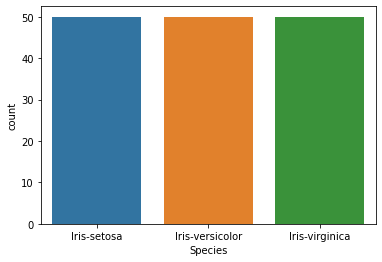

In [21]:
sns.countplot(dataset['Species'])

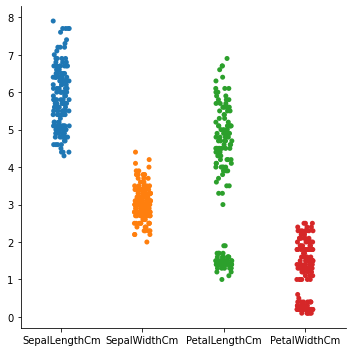

In [23]:
sns.catplot(data=a)

In [28]:
data1=dataset.iloc[:,1:]
data1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


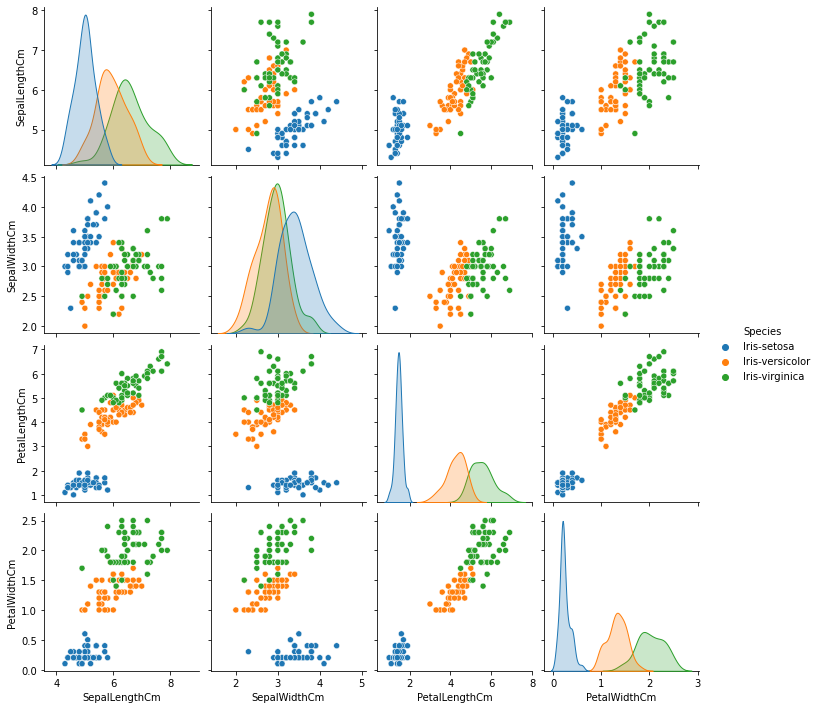

In [29]:
sns.pairplot(data1, hue="Species", height=2.5)

FINDING THE OPTIMUM NO.OF CLUSTERS

In [30]:
k=[]
for i in range(1,100):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(a.iloc[:,[0,1,2,3]])
    k.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow method')

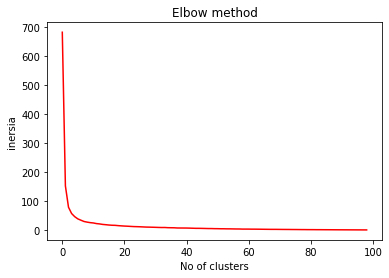

In [31]:
plt.plot(k,color='red')
plt.xlabel('No of clusters')
plt.ylabel('inersia')
plt.title('Elbow method')

APPLYING KMEANS TO THE DATASET

In [32]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
dataset['cluster_number']=kmeans.labels_
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_number
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


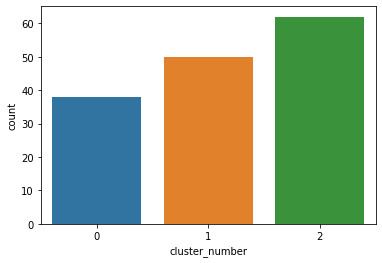

In [35]:
sns.countplot(dataset.cluster_number)

In [37]:
cdata=dataset.iloc[:,-2:]
pd.options.display.max_rows = 10
cdata

,Species,cluster_number
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,0
146,Iris-virginica,2
147,Iris-virginica,0
148,Iris-virginica,0


In [39]:
cdata2=cdata
cdata2['real']=0
cdata2

,Species,cluster_number,real
0,Iris-setosa,1,0
1,Iris-setosa,1,0
2,Iris-setosa,1,0
3,Iris-setosa,1,0
4,Iris-setosa,1,0
...,...,...,...
145,Iris-virginica,0,0
146,Iris-virginica,2,0
147,Iris-virginica,0,0
148,Iris-virginica,0,0


In [40]:
cdata2.loc[(cdata2['Species'] == 'Iris-setosa'), 'real'] = 1
cdata2.loc[(cdata2['Species'] == 'Iris-virginica'), 'real'] = 2

In [42]:
real=cdata2.real
dup=cdata2.cluster_number
heatmapper=pd.DataFrame()
heatmapper['real']=real
heatmapper['dup']=dup

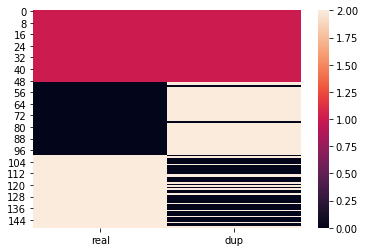

In [43]:
sns.heatmap(data=heatmapper)

PLOTTING

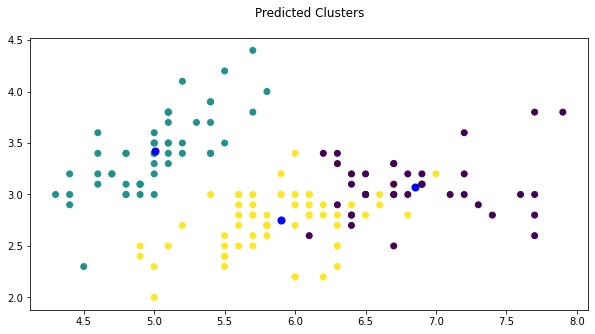

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(dataset['SepalLengthCm'], dataset['SepalWidthCm'], c=dataset.cluster_number)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=50, color='blue')
plt.show()